In [ ]:
import os
import cv2
import numpy as np
import pickle



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
def load_leaf_images_flattened(dataset_path, img_size=50):
    X, y, label_dict = [], [], {}

    class_folders = sorted(os.listdir(dataset_path))

    for idx, class_name in enumerate(class_folders):
        label_dict[idx] = class_name
        class_dir = os.path.join(dataset_path, class_name)

        for filename in os.listdir(class_dir):
            img_path = os.path.join(class_dir, filename)
            img = cv2.imread(img_path)

            if img is None:
                continue

            resized_img = cv2.resize(img, (img_size, img_size))
            flat_img = resized_img.flatten()

            X.append(flat_img)
            y.append(idx)

    X = np.array(X)
    y = np.array(y)
    np.savez("processed_leaf_data.npz", X, y)

    return X, y, label_dict


In [12]:

dataset_path = r"D://agroaidProject//dataset//PlantVillage//"

X, y, label_dict = load_leaf_images_flattened(dataset_path, img_size=50)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Scale



NameError: name 'load_leaf_images_flattened' is not defined

C:\Users\Dell\AppData\Local\Temp\ipykernel_17404\1743548541.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=label_series, order=label_series.value_counts().index, palette="Greens_r")


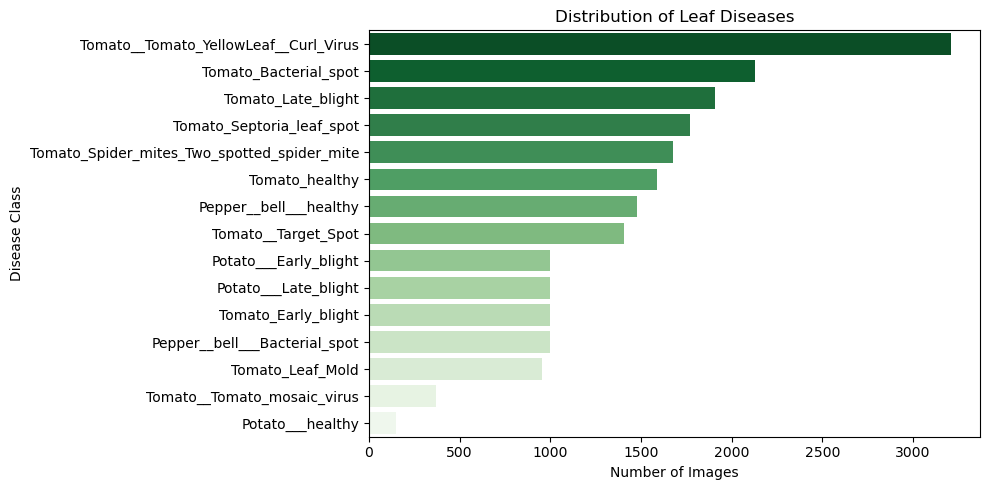

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert label numbers to class names
label_names = [label_dict[i] for i in y]
label_series = pd.Series(label_names, name="Class")

# Class distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=label_series, order=label_series.value_counts().index, palette="Greens_r")
plt.title("Distribution of Leaf Diseases")
plt.xlabel("Number of Images")
plt.ylabel("Disease Class")
plt.tight_layout()
plt.savefig("class_distribution.png")
plt.show()


In [11]:
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
df = pd.DataFrame(X_train_scaled)
df.columns = [f'feature_{i}' for i in range(df.shape[1])]
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.savefig("correlation_matrix.png")  # Save it for your presentation
plt.show()

In [12]:
X_train_scaled = X_train_scaled.astype('float32')
X_test_scaled = X_test_scaled.astype('float32')

pca = PCA(n_components=0.95)  # Keep 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use PCA-transformed data
df_pca = pd.DataFrame(X_train_pca)
correlation_matrix = df_pca.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=False)
plt.title("Correlation Matrix (PCA Features)")
plt.tight_layout()
plt.show()


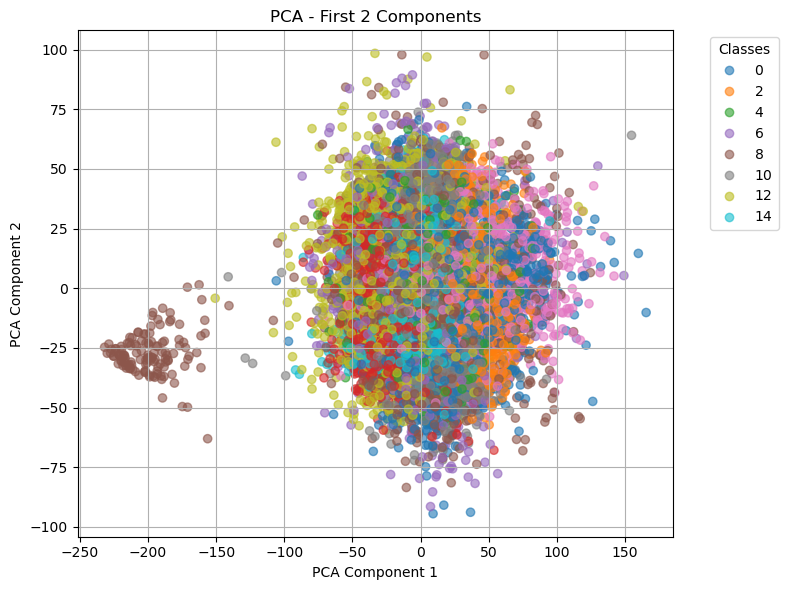

In [13]:
import matplotlib.pyplot as plt

# Reduce to 2 principal components for visualization
pca_2d = PCA(n_components=2)
X_vis = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, cmap='tab10', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA - First 2 Components')
plt.legend(*scatter.legend_elements(), title="Classes", bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig("pca_scatter.png")
plt.show()


In [14]:
# Logistic Regression
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_pca, y_train)
log_pred = log_model.predict(X_test_pca)
print("Logistic Accuracy:", accuracy_score(y_test, log_pred))

# SVM
svm_model = SVC()
svm_model.fit(X_train_pca, y_train)
svm_pred = svm_model.predict(X_test_pca)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_pca, y_train)
dt_pred = dt_model.predict(X_test_pca)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_pca, y_train)
knn_pred = knn_model.predict(X_test_pca)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


Logistic Accuracy: 0.6070736434108527
SVM Accuracy: 0.8127422480620154
Decision Tree Accuracy: 0.44525193798449614
KNN Accuracy: 0.4997577519379845


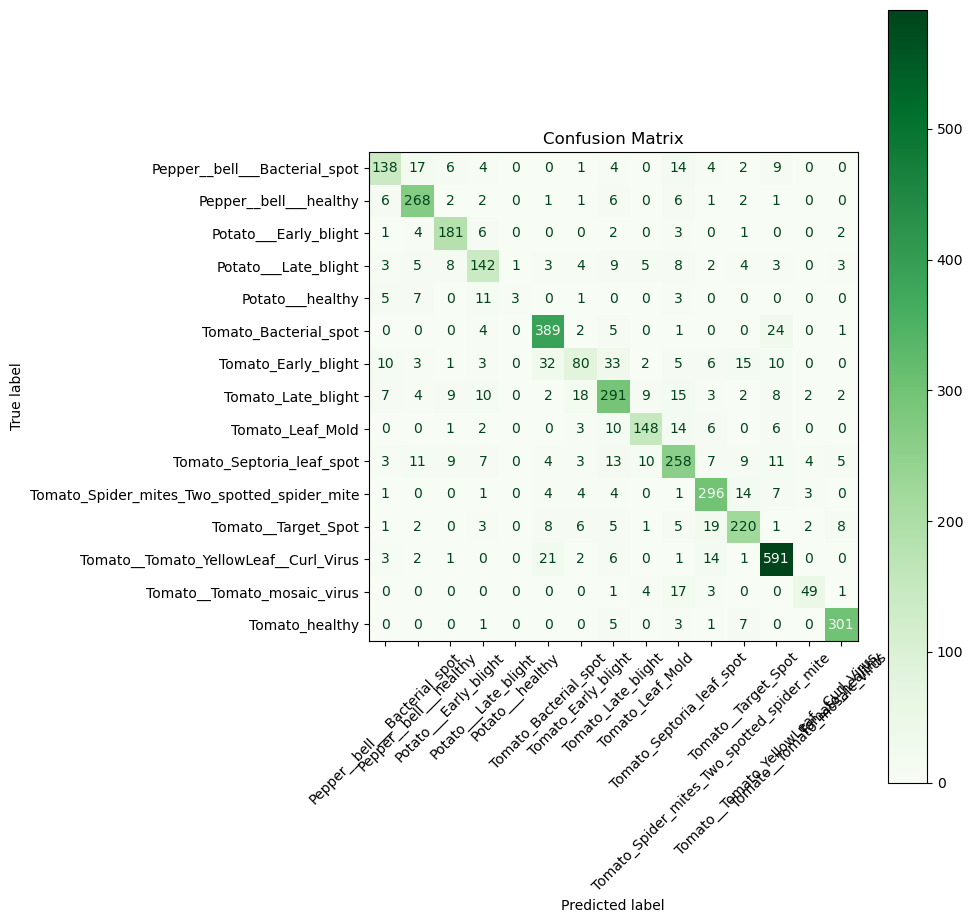

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Train SVM on PCA data if not already done
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train_pca, y_train)

# Predict
y_pred = svm.predict(X_test_pca)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_dict.values()))
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap='Greens', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix.png")
plt.show()


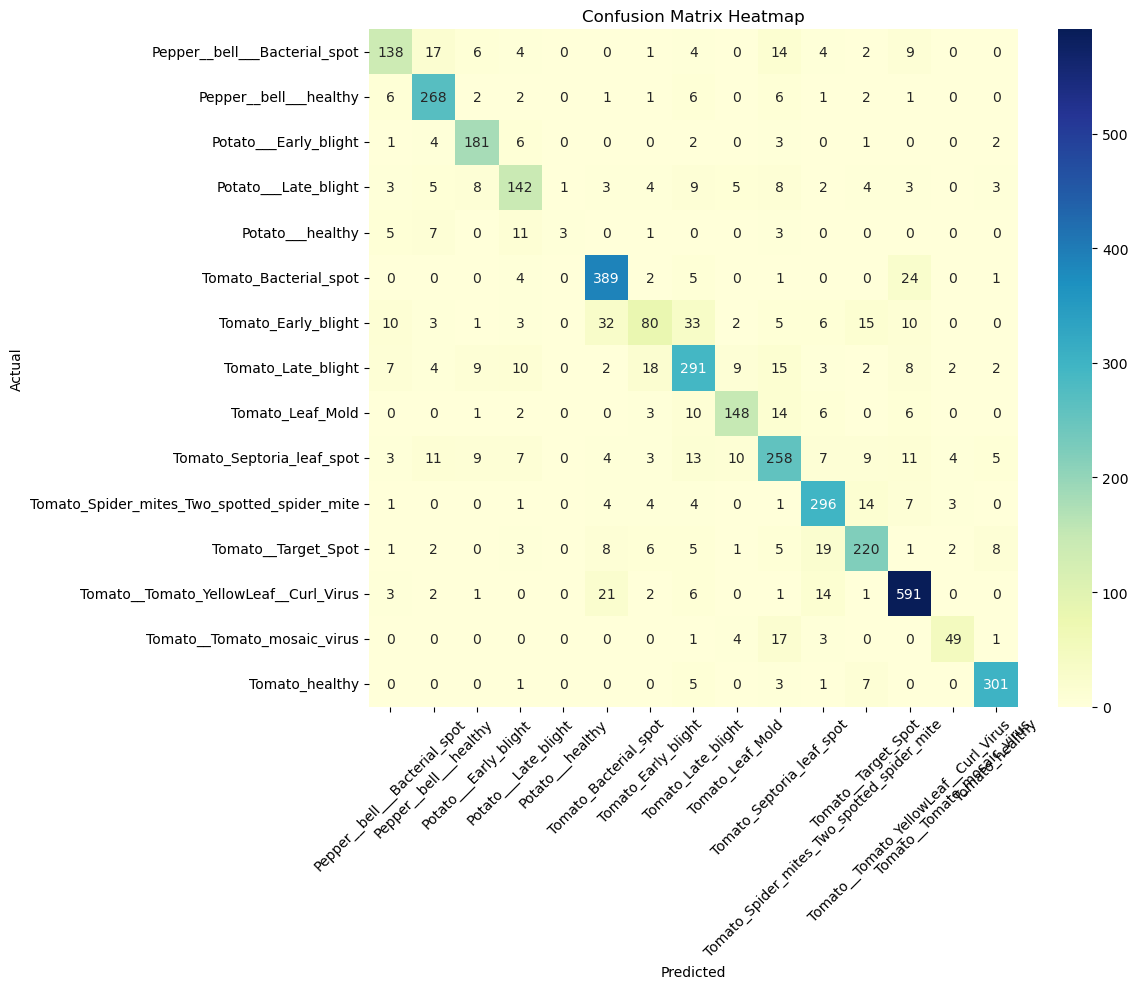

In [16]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=list(label_dict.values()), yticklabels=list(label_dict.values()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("confusion_heatmap.png")
plt.show()


In [9]:
# Save SVM model
with open("D:/agroaidProject/models/final_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

# Save scaler and PCA
with open("D:/agroaidProject/models/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("D:/agroaidProject/models/pca.pkl", "wb") as f:
    pickle.dump(pca, f)

# Save label dictionary
with open("D:/agroaidProject/models/label_dict.pkl", "wb") as f:
    pickle.dump(label_dict, f)


In [ ]:
%%writefile agroaid_app.py
import streamlit as st
from PIL import Image
import numpy as np
import os
import pickle
import json
import cv2

# Load disease info
with open("disease_info.json", "r") as f:
    disease_data = json.load(f)

# Load model and preprocessing
with open("models/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("models/pca.pkl", "rb") as f:
    pca = pickle.load(f)

with open("models/final_model.pkl", "rb") as f:
    model = pickle.load(f)


In [13]:

# App UI
st.set_page_config(page_title="AgroAid - Plant Disease Detector")
st.title("🌿 AgroAid: Smart Plant Disease Detection")

uploaded_file = st.file_uploader("📷 Upload a leaf image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    st.image(image, caption="Uploaded Leaf Image", use_column_width=True)

    # Convert PIL to OpenCV format
    img_np = np.array(image)
    img_resized = cv2.resize(img_np, (100, 100))
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_RGB2GRAY)
    flat = img_gray.flatten().reshape(1, -1)

    # Preprocess and predict
    scaled = scaler.transform(flat)
    reduced = pca.transform(scaled)
    prediction = model.predict(reduced)[0]

    # Get label and details
    predicted_label = list(disease_data.keys())[prediction]
    info = disease_data[predicted_label]

    # Display result
    st.subheader(f" Predicted Crop: {info['crop']}")
    st.write(f" **Disease**: {info['disease']}")
    st.write(f"**Cause**: {info['cause']}")
    if info["remedies"]:
        st.write(" **Remedies:**")
        for remedy in info["remedies"]:
            st.write(f" - {remedy}")
    if info["prevention"]:
        st.write(" **Prevention:**")
        for prev in info["prevention"]:
            st.write(f" - {prev}")
    st.write(f"**Crop Care Tip:** {info['crop_care']}")


Overwriting agroaid_app.py


In [ ]:
!streamlit run agroaid_app.py